<h1>Car Logo and Color Identification: Stage 4</h1>
<h4>Group 3 Members:</h4>

* Uzochi Dimpka
* Aaron Hong
* Mohammed Husein
* Afif Mujibur-Rahman
* Albert Oh

<h1>1. Modeling</h1>

<h2>Cost / Loss function</h2>
Yolov3 has 3 components in its losses:

1. Classification loss - When the model misslabels data.
2. Regression Loss - When the model incorrectly locates the object
3. Confidence loss - The percentage the model believes what is in the bounding box is correct

Below is the whole loss function of YoloV3 with visual markers on where each loss components are located

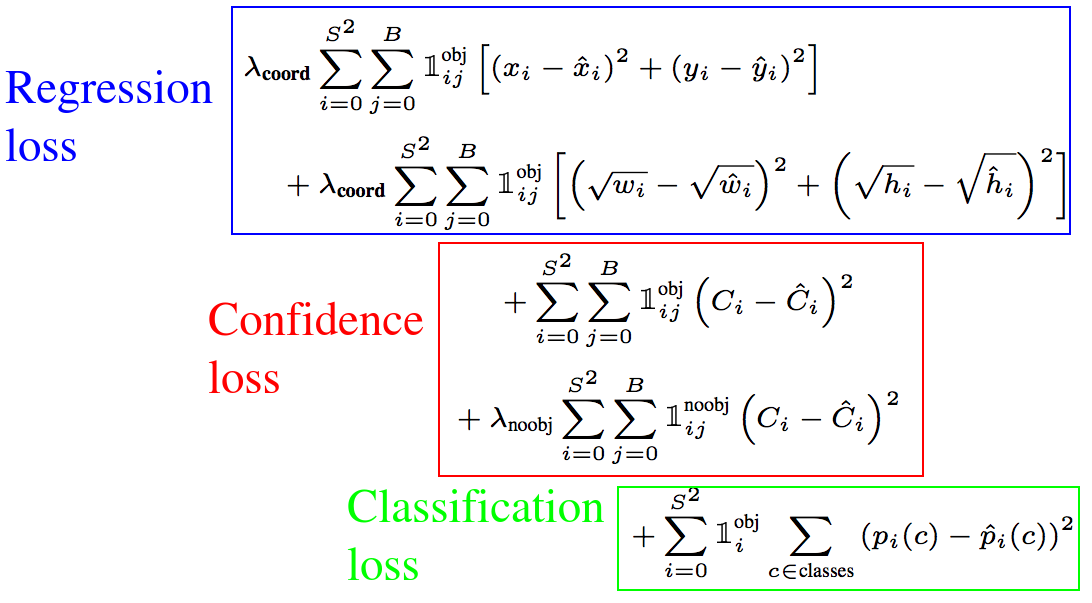

<h2>Types and Number of Layers</h2>
YOLOv3 uses 53 layers of convolution:

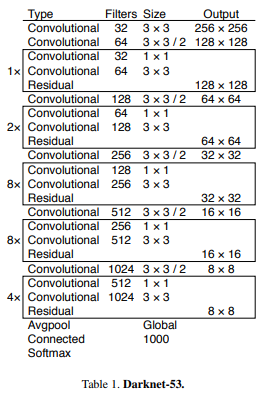

<h2>Hyper-Parameter Information</h2>

We tried a variety of hyper parameters and these are the parameters we choose:

* Batch: 8

* Subdivision: 16

We choose these as we had multiple training sessions done at the same time and these parameters gave us the best results during testing. We choose the smaller batches and subdivision as we were restricted on our GPU usage on google colab and needed to keep the training time within a reasonable time frame to prevent us from being locked out. Although even with choosing smaller numbers we were still unable to train in one session, as a result our loss function graph stopped early.

<h1>2. Experimentation</h1>
<h2>How did you set up your experiments? </h2>
We used You Only Look Once (YOLOv3), a real-time objection detection tool to both train our data and test it:

https://www.github.com/pjreddie/darknet

Alongside YOLOv3, we used a labeling tool called Yolo_Label that enabled us to streamline the process of setting coordinates for the bounding boxes in our training dataset.

https://www.github.com/developer0hye/Yolo_Label

We trained our model using around 200 images per car brand for 5 brands. These 5 brands were Audi, Toyota, Honda, Mercedes, and Lexus. We retrieved these images using a Google image scraper python script. Training our model gave us weights that we could use to finally make it see the car logos we designated. Here are some examples of our dataset:
//TODO: post examples of training dataset here
<br>
After training, we tested our complete model using 20 new images per car brand.
Here are some of the results of our testing:
<br>
<h2>Our Test-Run Model</h2>
Follow the instructions provided below to run our model:

___

***Be sure to change the runtime to GPU by going to Runtime>Change runtime type>Hardware accelerator>GPU**

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# verify CUDA
!/usr/local/cuda/bin/nvcc --version
# make darknet (build)
!make
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)
  %cd ..
from google.colab import drive
drive.mount('/content/gdrive')
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
!ls /mydrive/CarLogo/
%cd darknet
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/CarLogo/obj.names ./data
!cp /mydrive/CarLogo/obj.data  ./data

# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/CarLogo/yolov3_custom.cfg ./cfg

# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


In [ ]:
#Toyota
!./darknet detector test data/obj.data /mydrive/CarLogo/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights /mydrive/CarLogo/testing/test1.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
#Mercedes
!./darknet detector test data/obj.data /mydrive/CarLogo/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights /mydrive/CarLogo/testing/test2.jpg -thresh 0.3
imShow('predictions.jpg')

If you would like to test your own photos please be sure to rename the part in the parentheses to the file name after uploading it.


In [ ]:
#Honda (picture courtesy of Aaron)
!./darknet detector test data/obj.data /mydrive/CarLogo/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights /mydrive/CarLogo/testing/test3.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
#Lexus
!./darknet detector test data/obj.data /mydrive/CarLogo/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights /mydrive/CarLogo/testing/test4.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
#Audi
!./darknet detector test data/obj.data /mydrive/CarLogo/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights /mydrive/CarLogo/testing/test5.jpg -thresh 0.3
imShow('predictions.jpg')

<h2>Try it yourself:</h2>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#you can replace (PUT FILE NAME HERE) with your own directory pointing to a file
!./darknet detector test data/obj.data /mydrive/CarLogo/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights (PUT FILE NAME HERE) -thresh 0.3
imShow('predictions.jpg')

___

<h1>3. Literature Review</h1>
<h2>Motivation For Using Our Method and Citations</h2>

Object Detection In Shelf Images with YOLO - Ceren Gülra Melek, Elena Battini Sőnmez, Songul Varlı Albayrak:

https://www.researchgate.net/publication/335202398_Object_Detection_in_Shelf_Images_with_YOLO

This source helped introduce the topic of YOLO and showed us what a well defined algorithm looks like. It also showed us what can be done with a bounding box and how to make one. One last thing the article showed is the importance of batch size. All three of these factors will go into making our model.

IQA: Visual Question Answering in Interactive Environments - Daniel Gordon2 Aniruddha Kembhavi, Mohammad Rastegari, Joseph Redmon, Dieter Fox, Ali Farhadi: 

https://pjreddie.com/media/files/papers/IQA.pdf

This source helped show the importance of tweaking parameters when making an artificial intelligence. In our project, we are tweaking various parameters to see which data model returns the best data. Due to our experimentation, we were able to make a strong model.

https://www.youtube.com/watch?v=hTCmL3S4Obw&ab_channel=WhenMathsMeetCoding

This source was a tutorial on how to set up and use YOLOv3. Helped us set up the initial model and notebook. Also taught us how to use darknet by making use of a vm. This enabled us to use the resources that darknet offers. 

https://pylessons.com/YOLOv3-TF2-mnist

This source provided information on making a loss function from images when using YOLO

<h1>4. Results</h1>
<h2>Loss Function Graph</h2>

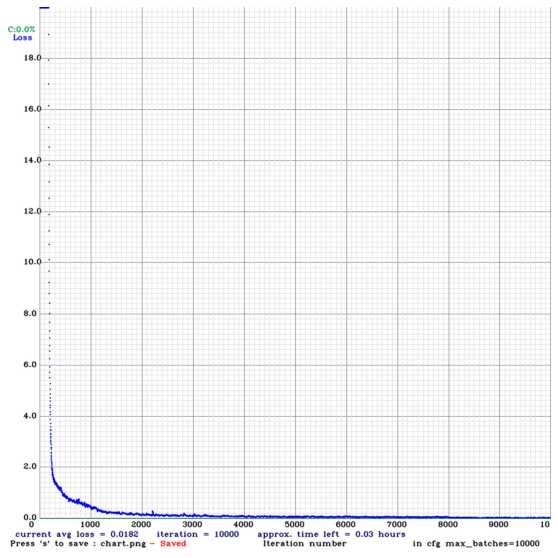

In [ ]:
#Make a folder called results in your MyDrive
# results_TXT.txt
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights -thresh 0.3 -dont_show -ext_output < /mydrive/results/train.txt > /mydrive/results/results_TXT.txt

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 

In [ ]:
# results_JSON.json
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/CarLogo/yolov3_custom_final.weights -thresh 0.3 -dont_show -ext_output -out /mydrive/results/results_JSON.json < /mydrive/results/train.txt

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 12, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import json
file1 = open('/content/drive/MyDrive/results/results_JSON.json')
data_pred = json.load(file1)
#TODO read txt files with space as delimiter

def calcTopLeftBottomRight(box):
  #box = [x_center, y_center, width, height]
  x_top_left = box[0] - box[2]/2.0
  y_top_left = box[1] - box[3]/2.0
  x_bottom_right = box[0] + box[2]/2.0
  y_bottom_right = box[1] + box[3]/2.0 
  box_new = [x_top_left, y_top_left, x_bottom_right, y_bottom_right]
  return box_new
#refactor getActualBox to read from txt file
def getActualBox(x_center, y_center, width, height):
  box_actual = [x_center, y_center, width, height]
  box_actual_new = calcTopLeftBottomRight(box_actual)
  return box_actual_new

def getActualBox_pred(id, data):
  box_actual = [data[id]['objects'][0]['relative_coordinates']['center_x'], 
                data[id]['objects'][0]['relative_coordinates']['center_y'], 
                data[id]['objects'][0]['relative_coordinates']['width'], 
                data[id]['objects'][0]['relative_coordinates']['height']]
  box_actual_new = calcTopLeftBottomRight(box_actual)
  return box_actual_new

#training dataset and prediction dataset coordinate information
audi_actual = getActualBox(0.492754, 0.512621, 0.107023, 0.073786)
audi_pred = getActualBox_pred(0,data_pred)
honda_actual = getActualBox(0.273060, 0.523838, 0.029322, 0.039333)
honda_pred = getActualBox_pred(1,data_pred)
lexus_actual = getActualBox(0.328317, 0.646414, 0.030100, 0.061753)
lexus_pred = getActualBox_pred(2,data_pred)
mercedes_actual = getActualBox(0.709588, 0.529126, 0.021182, 0.036893)
mercedes_pred = getActualBox_pred(3,data_pred)
toyota_actual = getActualBox(0.822027, 0.517657, 0.039904, 0.049759)
toyota_pred = getActualBox_pred(4,data_pred)

def calcTP(actual, pred):
  x_left = max(actual[0], pred[0])
  y_top = max(actual[1], pred[1])
  x_right = min(actual[2], pred[2])
  y_bottom = min(actual[3], pred[3])
  overlap_area = (x_right - x_left) * (y_bottom - y_top)
  return overlap_area

#Hardcoded resolution values and coordinates, will consider scope later
print("Audi True Positive Pixels: " + f"{calcTP(audi_actual, audi_pred) * 1000 * 563}")
print("Honda True Positive Pixels: " + f"{calcTP(honda_actual, honda_pred) * 840 * 560}")
print("Lexus True Positive Pixels: " + f"{calcTP(lexus_actual, lexus_pred) * 568 * 224}")
print("Mercedes True Positive Pixels: " + f"{calcTP(mercedes_actual, mercedes_pred) * 1920 * 1301}")
print("Toyoto True Positive Pixels: " + f"{calcTP(toyota_actual, toyota_pred) * 640 * 480}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Audi True Positive Pixels: 4445.897880913999
Honda True Positive Pixels: 542.5227751104001
Lexus True Positive Pixels: 236.4708557765121
Mercedes True Positive Pixels: 1947.387199699202
Toyoto True Positive Pixels: 609.9711393791983
